# Colour-blind Safe Palettes

Colour vision deficiency (a.k.a colour-blindness) is a condition that can effect upward of 5% of the population, and often results in difficulty percieving distinctions between some colours. The most common kinds of colour vision deficiency result in difficulty percieving differences between colours in the re-green range. Glasbey offers some features that can help make created or extended colour palettes more easily distinguished by those with some degree of colour vision deficiency. 

It should be noted that the methods used in Glasbey can at best aid in the creation of palettes that are *more* accessible to individuals with colour vision deficiency. Just as a large enough palette will result in some colours that are hard to distinguish without colour vision deficiency, even using the options described here cannot ensure that individuals with colour vision deficiency will not have any difficulty distinguishing among colours in the palettes created.

To demonstrate some examples of palettes that are more assessible to individuals with colour vision deficiency we'll need to import glasbey, and to visualize the colour palettes we'll use seaborn.

In [1]:
import glasbey
import seaborn as sns

sns.set()

The most basic option, available in all the standard `glasbey` functions (`create_palette`, `extend_palette` and `create_block_palette`), is to set the option `colorblind_safe=True`. 

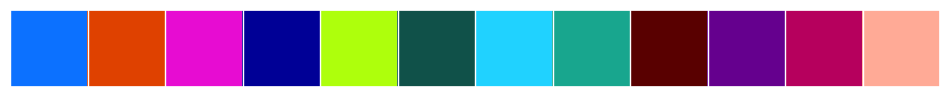

In [14]:
palette = glasbey.create_palette(palette_size=12, colorblind_safe=True)
sns.palplot(palette)

Note how the resulting palette selects reds and blues first, before eventually selecting greens, but attempts to use lightness contrast among those to make them more distinguishable. Because palette optimization by hill-climbing among neighbors is harder when measuring distances in a colour-vision-deficient-perceptual-space but selecting neighbors in the full colour space,  it can be beneficial to increase the optimization search radius to help it get more distinguishability:

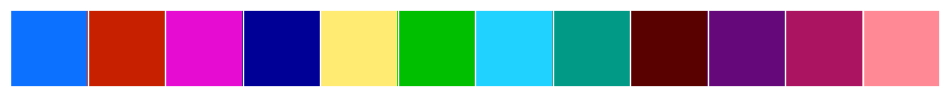

In [17]:
palette = glasbey.create_palette(palette_size=12, colorblind_safe=True, optimize_palette_search_radius=50)
sns.palplot(palette)

The default `colorblind_safe=True` options simulates only mild colour vision deficiency of the most common variety. To be robust against more severe cases of colour vision deficiency you can use the `cvd_severity` option, which takes values between 0, for essentially no deficiency, through to 100, which represents the most severe cases.

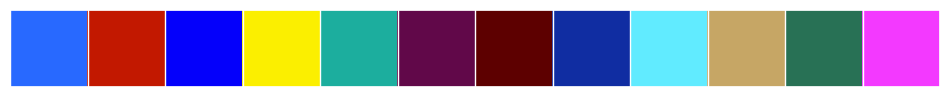

In [20]:
palette = glasbey.create_palette(palette_size=12, colorblind_safe=True, cvd_severity=100, optimize_palette_search_radius=50)
sns.palplot(palette)

Note that this biasing of palette choices may make the resulting palette less accessible to those without colour vision deficiency than it might otherwise be -- since the options for colour choices are more constrained.

It is also possible to create a palette using simulations of other types of colour vision deficiency. The default option is the most common type: "deuteranomaly", but the `cvd_type` option can be used to specify "protanomaly" or "tritanomaly" which are a more rare red-green colorblindness, and an extremely rare blue-yellow colorblindness.

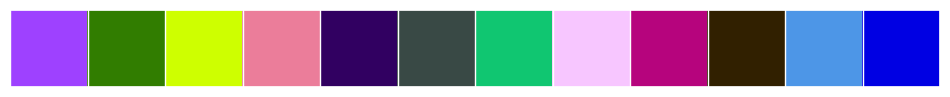

In [21]:
palette = glasbey.create_palette(
    palette_size=12, 
    colorblind_safe=True, 
    cvd_type="protanomaly",
    cvd_severity=100
)
sns.palplot(palette)

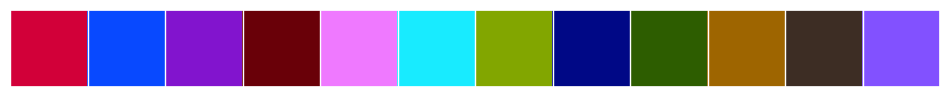

In [22]:
palette = glasbey.create_palette(
    palette_size=12, 
    colorblind_safe=True, 
    cvd_type="tritanomaly",
    cvd_severity=100
)
sns.palplot(palette)

These same options apply to the `extend_palette` and `create_block_palette` functions, although in those cases there are other colours involved (from the source palette, or the range of colours selected in a block) that make the problem even more challenging.

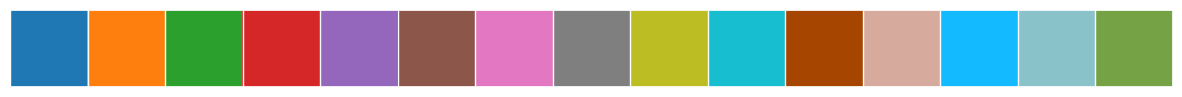

In [23]:
palette = glasbey.extend_palette(
    "tab10", 
    palette_size=15, 
    colorblind_safe=True, 
    cvd_severity=100
)
sns.palplot(palette)

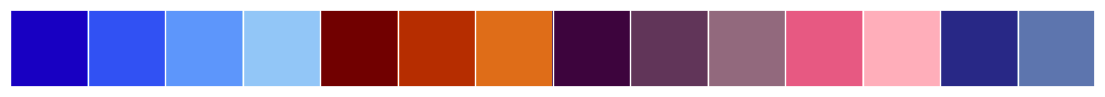

In [24]:
palette = glasbey.create_block_palette(
    [4, 3, 3, 2, 2],
    colorblind_safe=True, 
    cvd_severity=100
)
sns.palplot(palette)